# 快速运行 MMagic

```bash
pip install controlnet_aux diffusers click av einops face-alignment facexlib lpips mediapipe resize_right transformers accelerate
```

In [1]:
from set_env import temp_dir, root_dir
(temp_dir/"output").mkdir(exist_ok=True)

从文本生成图像：

```python
from mmagic.apis import MMagicInferencer
sd_inferencer = MMagicInferencer(model_name='stable_diffusion')
text_prompts = 'A panda is having dinner at KFC'
result_out_dir = 'output/sd_res.png'
sd_inferencer.infer(text=text_prompts, result_out_dir=result_out_dir)
```

MMagic 的超分辨率：

In [2]:
from mmagic.apis import MMagicInferencer
config = 'configs/esrgan/esrgan_x4c64b23g32_1xb16-400k_div2k.py'
checkpoint = 'https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth'
img_path = root_dir/'tests/datasets/image/lq/baboon_x4.png'
editor = MMagicInferencer('esrgan', model_config=config, model_ckpt=checkpoint)
result_out_dir = 'images/output.png'
output = editor.infer(img=img_path, result_out_dir=result_out_dir)

/media/pc/data/lxw/envs/anaconda3x/envs/xxx/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/media/pc/data/lxw/ai/envs/tasks/mmagic/mmagic/apis/mmagic_inferencer.py:186: UserWarning: esrgan's default config is overridden by configs/esrgan/esrgan_x4c64b23g32_1xb16-400k_div2k.py
  warnings.warn(
/media/pc/data/lxw/ai/envs/tasks/mmagic/mmagic/apis/mmagic_inferencer.py:193: UserWarning: esrgan's default checkpoint is overridden by https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth
  warnings.warn(
/media/pc/data/lxw/ai/envs/tasks/mmagic/mmagic/visualization/concat_visualizer.py:17: SyntaxWarning: invalid escape sequence '\*'
  """Visualize multiple images by concatenation.
/medi

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth
11/19 14:11:45 - mmengine - WARNING - Failed to search registry with scope "mmagic" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmagic" is a correct scope, or whether the registry is initialized.


/media/pc/data/lxw/envs/anaconda3x/envs/xxx/lib/python3.12/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


11/19 14:11:46 - mmengine - WARNING - Cannot find key 'gt_img' in data sample.


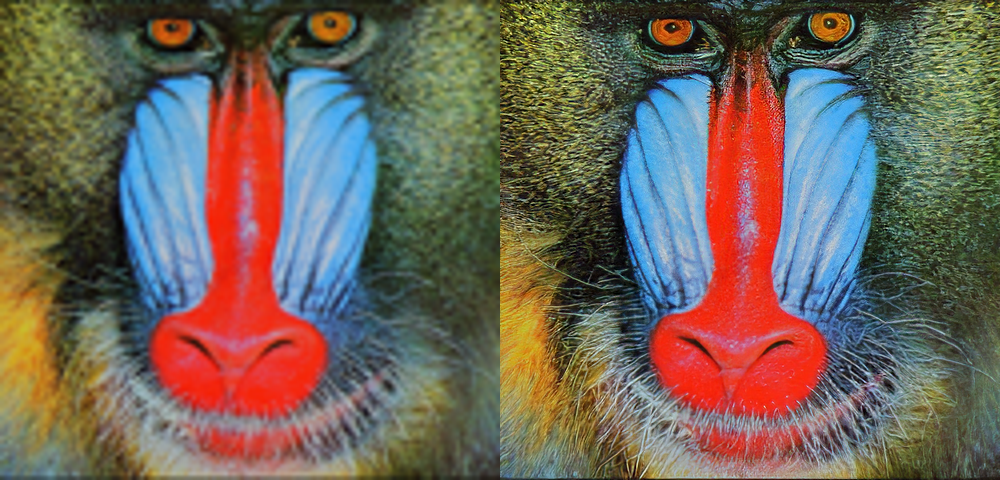

In [3]:
from PIL import Image
import numpy as np
im1 = Image.open(img_path)
im2 = Image.open(result_out_dir)
Image.fromarray(np.concatenate([im1.resize(im2.size), im2], axis=1))

In [7]:
!python print_config.py

usage: print_config.py [-h] [--cfg-options CFG_OPTIONS [CFG_OPTIONS ...]]
                       config
print_config.py: error: the following arguments are required: config
